In [1]:
from display_images_with_lbp import display_images_with_lbp
from compare_histogram_distance import compare_histograms

import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Content Recognition Menggunakan Local Binary Patterns**
---

#### Pengantar
Local Binary Patterns (LBP) pertama kali diperkenalkan dalam Konferensi Internasional Pengakuan Pola pada tahun 1994 oleh Timo Ojala, Matti Pietikäinen, dan David Harwood dalam makalah yang berjudul "Performance Evaluation of Texture Measures with Classification Based on Kullback Discrimination of Distributions" ([sumber](https://ieeexplore.ieee.org/document/576366)).

Pada bab ini, kamu akan belajar cara membuat deskriptor fitur biner tipe gambar LBP dan histogram LBP untuk klasifikasi gambar bertekstur dan tidak bertekstur. Kamu akan mempelajari berbagai metode yang bisa digunakan untuk menghitung perbedaan antara histogram untuk menemukan kecocokan antara berbagai gambar dan cara menyetel parameter LBP untuk mengoptimalkan kinerjanya.

#### Topik yang Akan Dibahas
Bab ini akan mencakup topik-topik berikut:
1. **Memproses gambar menggunakan LBP**
2. **Menerapkan LBP untuk pengenalan tekstur**
3. **Mencocokkan warna wajah dengan warna foundation – LBP dan keterbatasannya**
4. **Mencocokkan warna wajah dengan warna foundation – teknik pencocokan warna**

#### Mengapa Penting untuk Dipelajari?
Mempelajari LBP penting karena metode ini digunakan secara luas dalam pengolahan citra dan pengenalan pola, bidang yang memiliki banyak aplikasi praktis. Contohnya meliputi:
- **Sistem Keamanan**: LBP digunakan dalam pengenalan wajah untuk sistem keamanan.
- **Pengenalan Objek**: Membantu dalam identifikasi dan klasifikasi objek dalam gambar, berguna dalam robotika dan sistem pengawasan.
- **Pengolahan Citra Medis**: Digunakan untuk menganalisis tekstur dalam gambar medis, seperti MRI atau CT scan, untuk mendeteksi kelainan.

#### Contoh Aplikasi di Kehidupan Nyata
1. **Pengawasan Keamanan**: Kamera pengawas menggunakan teknologi LBP untuk mengenali wajah dan mencocokkannya dengan database penjahat atau orang yang dicari.
2. **Aplikasi Kecantikan**: Aplikasi yang membantu orang mencocokkan warna kulit mereka dengan warna foundation yang tepat menggunakan teknik LBP.
3. **Robotika**: Robot yang dapat mengenali dan membedakan objek di sekitarnya menggunakan LBP untuk navigasi dan interaksi yang lebih baik.

## **Memproses Gambar Menggunakan LBP**
---

LBP adalah operasi ambang gambar skala abu-abu yang digunakan untuk mengklasifikasikan gambar berdasarkan pola-pola yang berbeda. Pola biner dikembangkan dengan membandingkan nilai piksel tetangga dengan nilai piksel pusat dan digunakan untuk membentuk histogram bin. Pada bagian berikut, kita akan menjelaskan operasi LBP secara detail.

#### Cara Kerja LBP
1. **Ambil Gambar Skala Abu-abu**: Pertama, kita mulai dengan gambar skala abu-abu. Ini berarti setiap piksel dalam gambar memiliki nilai intensitas antara 0 (hitam) hingga 255 (putih).
2. **Tentukan Piksel Pusat**: Pilih satu piksel sebagai piksel pusat.
3. **Bandingkan dengan Piksel Tetangga**: Bandingkan nilai intensitas piksel pusat dengan nilai intensitas piksel-piksel tetangganya (biasanya 8 piksel di sekitar piksel pusat).
4. **Bentuk Pola Biner**: Jika nilai piksel tetangga lebih besar atau sama dengan piksel pusat, tuliskan '1', jika lebih kecil tuliskan '0'. Ini membentuk pola biner 8-bit.
5. **Hitung Nilai Desimal**: Ubah pola biner ini menjadi nilai desimal.
6. **Buat Histogram**: Ulangi proses ini untuk setiap piksel dalam gambar dan catat nilai desimal yang dihasilkan ke dalam histogram.

#### Contoh Praktis
Bayangkan kita memiliki gambar dengan piksel pusat bernilai 150, dan piksel-piksel tetangganya memiliki nilai: 
$
\begin{bmatrix}
140 & 160 & 150 \\
130 & 150 & 170 \\
140 & 160 & 150 \\
\end{bmatrix}
$
Langkah-langkahnya adalah sebagai berikut:
- Bandingkan setiap nilai tetangga dengan 150 (nilai piksel pusat):
  - [140 < 150, 160 > 150, 150 = 150, 130 < 150, 170 > 150, 140 < 150, 160 > 150, 150 = 150]
  - Hasilnya adalah pola biner: [0, 1, 1, 0, 1, 0, 1, 1]
- Ubah pola biner ini menjadi desimal: 01101011 (biner) = 107 (desimal)
- Tambahkan 107 ke dalam histogram.

#### Mengapa LBP Berguna?
Dengan cara ini, LBP mengubah informasi tekstur lokal menjadi bentuk histogram yang mudah dianalisis dan dibandingkan. Hal ini sangat berguna dalam:
- **Pengenalan Wajah**: Untuk mengenali wajah berdasarkan pola-pola tekstur.
- **Deteksi Tekstur**: Untuk mengidentifikasi jenis-jenis tekstur dalam gambar, seperti kayu, kain, atau kulit.
- **Pengenalan Objek**: Membantu sistem pengenalan objek dalam memahami dan membedakan pola tekstur dalam gambar.


### **Membuat Pola LBP**
---

#### Langkah-langkah Utama untuk Membuat Pola LBP
1. **Konversi Gambar RGB menjadi Gambar Skala Abu-abu**: Ubah gambar berwarna (RGB) A menjadi gambar skala abu-abu G.
2. **Pilih Piksel dan Tetangganya**: Untuk setiap piksel dengan intensitas $I_c$ (x, y) dalam gambar G, pilih P titik tetangga $(p_0, p_1, ..., p_{P-1})$ dengan intensitas yang sesuai $(I_0, I_1, ..., I_{P-1})$ pada radius R. Radius didefinisikan dalam satuan piksel sebagai jarak antara dua piksel. Piksel pusat dan titik-titik tetangganya membentuk jendela geser, W, dari gambar G. Untuk radius R = 1, P menjadi 8, seperti yang ditunjukkan di bawah ini.
   Jendela geser, W0, direpresentasikan sebagai array. Di sini, titik-titik 0 hingga P-1 mewakili intensitas titik-titik di sekitar piksel pusat, c:

   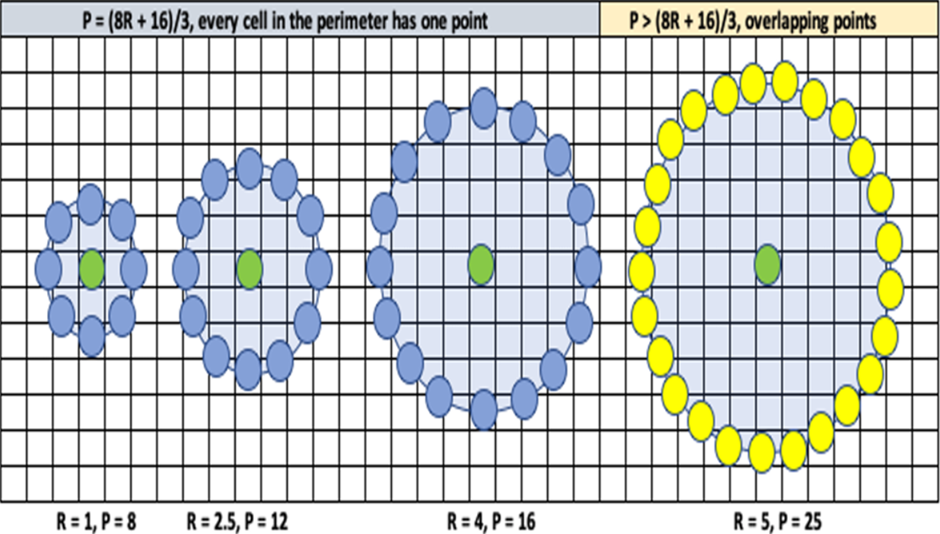

3. **Perhitungan Perbedaan Intensitas**: Hitung perbedaan intensitas antara piksel tetangga dan piksel pusat, lalu hapus nilai pertama, yaitu 0. Array dapat direpresentasikan sebagai berikut:
   $
   W1 = [I_0 - I_c, I_1 - I_c, ..., I_{P-1} - I_c]
   $

4. **Ambang Batas Gambar**: Untuk melakukan ini, tetapkan nilai 0 jika perbedaan intensitas kurang dari 0 dan 1 jika perbedaan intensitas lebih besar dari 0, seperti yang ditunjukkan oleh persamaan berikut:
   $
   W2 = [f(I_0 - I_c), f(I_1 - I_c), ..., f(I_{P-1} - I_c)]
   $
   Sebagai contoh, array dapat direpresentasikan sebagai berikut dengan asumsi perbedaan pertama kurang dari 0 dan perbedaan kedua serta terakhir lebih besar dari 0:
   $
   W2 = [0, 1, ..., 1]
   $

5. **Kalkulasi Kode LBP**: Array perbedaan, W2, dikalikan dengan bobot binomial $2^p$ untuk menerjemahkan array biner, W2, menjadi kode LBP yang merepresentasikan array desimal W3:
   $
   W3 = LBP(P, R) = \sum_{p=0}^{P-1} f(I_P - I_C) \times 2^p
   $
   
   Catat bahwa lima langkah yang dijelaskan dalam bagian ini akan dirujuk dalam beberapa bagian berikutnya. Diagram berikut menunjukkan representasi grafis dari operasi LBP pada jendela geser dari gambar skala abu-abu:

   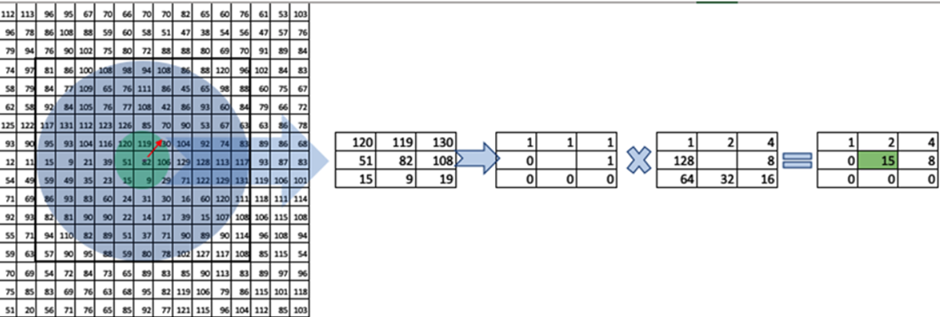

#### Contoh Praktis
1. **Konversi Gambar**: Misalkan kita memiliki gambar RGB yang dikonversi menjadi gambar skala abu-abu.
2. **Pilih Piksel Pusat**: Misalkan kita memilih piksel pusat dengan nilai intensitas 82.
3. **Pilih Tetangga dan Hitung Perbedaan**: Tetangga-tetangga memiliki nilai intensitas [120, 150, 130, 90, 85, 100, 51, 70]. 
   - Perbedaan intensitas: [120 - 82, 150 - 82, ..., 51 - 82]
   - Perbedaan menjadi: [38, 68, 48, 8, 3, 18, -31, -12]
4. **Terapkan Fungsi Ambang**: 
   - Hasil ambang: [1, 1, 1, 1, 1, 1, 0, 0] (karena hanya dua nilai terakhir yang kurang dari 0)
5. **Hitung Kode LBP**: 
   - Bobot binomial: $[2^0, 2^1, 2^2, 2^3, 2^4, 2^5, 2^6, 2^7]$
   - Kode LBP: $1*2^0 + 1*2^1 + 1*2^2 + 1*2^3 + 1*2^4 + 1*2^5 + 0*2^6 + 0*2^7 = 1 + 2 + 4 + 8 + 16 + 32 = 63$

#### Mengapa Penting?
Dengan memahami dan menerapkan langkah-langkah ini, kamu dapat mengubah pola tekstur gambar menjadi informasi biner yang dapat digunakan untuk pengenalan dan klasifikasi lebih lanjut. Ini sangat berguna dalam berbagai aplikasi seperti:
- **Pengenalan Wajah**
- **Deteksi Tekstur**
- **Pengolahan Citra Medis**

### **Memahami Histogram LBP**
---

Array LBP $W3$ direpresentasikan dalam bentuk histogram sebagai berikut:
$
W4 = \text{histogram}(W3, \text{bins}=P, \text{range}=\text{min}(W3) \text{ hingga } \text{max}(W3))
$
Langkah 1 hingga 5 dari bagian sebelumnya diulangi baik untuk gambar yang dilatih maupun gambar uji untuk membuat histogram LBP dari gambar (Wtrain, Wtest) yang masing-masing berisi P bin, yang kemudian dibandingkan menggunakan metode perbandingan histogram.

#### Metode Perbandingan Histogram
Menghitung jarak antara histogram pada LBP (Local Binary Patterns) adalah metode untuk mengukur seberapa mirip dua gambar berdasarkan tekstur yang ada di dalam gambar tersebut. Berikut adalah interpretasi dari masing-masing metode yang digunakan untuk menghitung jarak antara histogram LBP:

1. **Metode Intersection (Persimpangan)**:
   Dalam Python, ini diekspresikan sebagai berikut:
   ```python
   minima = np.minimum(test_hist, train_hist)
   intersection = np.true_divide(np.sum(minima), np.sum(train_hist))
   ```

   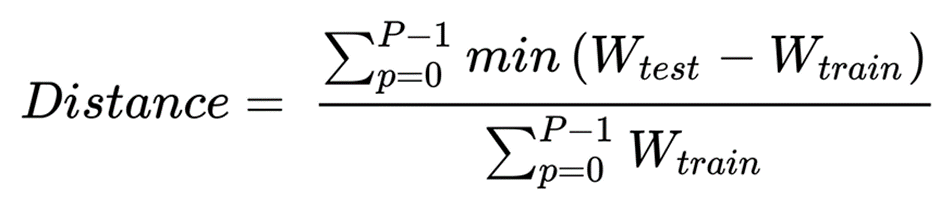

   - **Interpretasi**: Nilai hasil dari metode ini menunjukkan persentase kemiripan antara dua histogram. Nilai yang lebih tinggi (mendekati 1) menunjukkan bahwa kedua gambar memiliki distribusi fitur LBP yang sangat mirip. Metode ini mengukur seberapa besar area yang tumpang tindih antara dua histogram.

2. **Metode Chi-Square**:
   Metode ini mengukur perbedaan antara dua histogram berdasarkan rumus Chi-Square.

   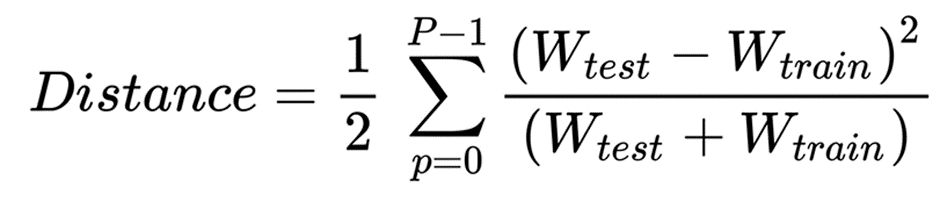

   - **Interpretasi**: Nilai hasil dari metode ini menunjukkan perbedaan antara dua histogram. Nilai yang lebih kecil menunjukkan bahwa kedua histogram memiliki distribusi yang lebih mirip. Metode ini peka terhadap perbedaan kecil dalam distribusi histogram dan lebih berat untuk nilai yang lebih besar dalam histogram.

3. **Metode Euclidean**:
   Mengukur jarak langsung antara dua histogram dengan menggunakan jarak Euclidean.

   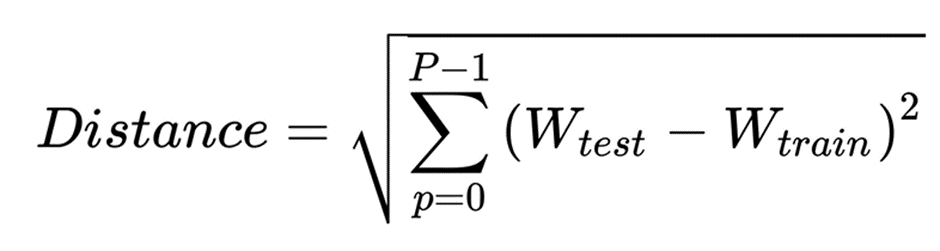

   - **Interpretasi**: Nilai hasil dari metode ini menunjukkan jarak geometris antara dua histogram dalam ruang multidimensi. Nilai yang lebih kecil menunjukkan kemiripan yang lebih tinggi. Metode ini mengukur perbedaan keseluruhan antara dua histogram.

4. **Metode City Block**:
   Juga dikenal sebagai jarak Manhattan, metode ini mengukur jarak antara dua titik dalam grid berbasis aksial.

   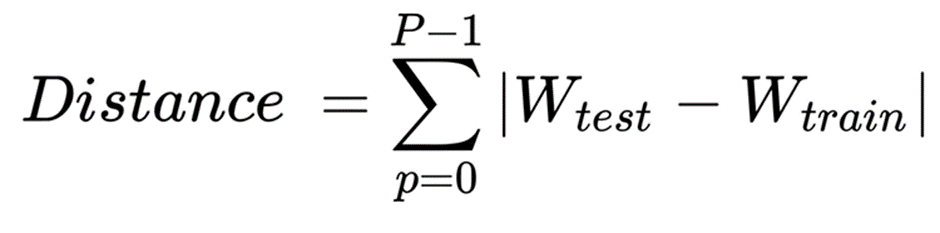

   - **Interpretasi**: Nilai hasil dari metode ini menunjukkan total perbedaan absolut antara dua histogram. Nilai yang lebih kecil menunjukkan bahwa kedua histogram lebih mirip. Metode ini mengukur jumlah perbedaan dalam setiap bin histogram.

5. **Metode Bhattacharyya**:
   Mengukur kesamaan antara dua distribusi statistik.

   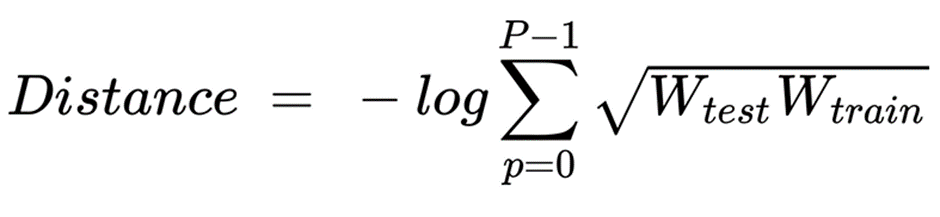

   - **Interpretasi**: Nilai hasil dari metode ini menunjukkan kesamaan statistik antara dua histogram. Nilai yang lebih besar menunjukkan kemiripan yang lebih tinggi. Metode ini mengukur kesamaan distribusi statistik antara dua histogram.


6. **Metode Wasserstein**:
   Diberikan $\mu_1$ dan $\mu_2$, di sini, $\mu$ adalah mean (momen ke-1) dari distribusi, $\sigma$ (momen ke-2) adalah standar deviasi distribusi, dan $\rho_{QQ}$ adalah korelasi kuantil dari dua distribusi $\mu_1$ dan $\mu_2$.
   
   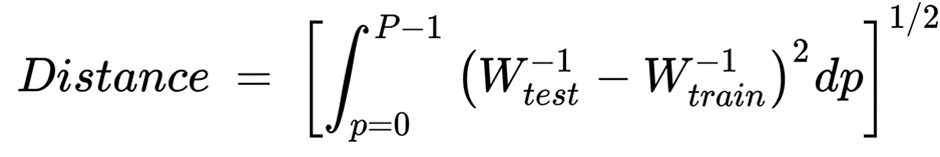

   - **Interpretasi**: Nilai hasil dari metode ini menunjukkan jumlah "kerja" yang diperlukan untuk mengubah satu distribusi menjadi distribusi lainnya. Nilai yang lebih kecil menunjukkan kemiripan yang lebih tinggi. Metode ini mempertimbangkan lokasi, ukuran, dan bentuk distribusi histogram.

   Metode Wasserstein menghitung jarak berdasarkan lokasi (perbedaan rata-rata), ukuran (perbedaan standar deviasi), dan bentuk (koefisien korelasi).

#### Karakteristik Metode Perbandingan Histogram
- Nilai absolut jarak berbeda untuk setiap metode.
- Jarak minimum antara nilai histogram uji dan pelatihan serupa untuk semua metode kecuali metode Wasserstein.
- Metode Wasserstein menghitung jarak berdasarkan lokasi (perbedaan mean), ukuran (perbedaan standar deviasi), dan bentuk (koefisien korelasi).

Diagram berikut menunjukkan gambar skala abu-abu asli dan gambar LBP yang sesuai untuk radius tertentu, R=5:

#### Evaluasi Efek Perubahan Radius terhadap Ketajaman Gambar
Untuk mengevaluasi efek perubahan radius terhadap ketajaman gambar, kita perlu menjalankan kode Python dengan mengubah nilai radius dari 1 hingga 10. Efek yang dihasilkan pada ketajaman gambar LBP ditunjukkan dalam gambar berikut. Hubungan antara radius dan jumlah titik diperoleh dari persamaan $P = \frac{8R+16}{3}$. Perhatikan bahwa seiring bertambahnya radius, pola dalam gambar menjadi lebih jelas. Sekitar radius 5 dan titik 20-25, pola menjadi lebih jelas dengan pola utama lengkungan utama, bersama dengan pola sekunder. Pada radius yang sangat tinggi, pola sekunder menjadi kurang jelas:

#### Pentingnya Memilih R dan P
- Memilih nilai R dan P sangat penting untuk pengenalan pola.
- Nilai awal dapat dipilih dengan $P = \frac{8R + 16}{3}$, tetapi untuk nilai R tertentu, nilai P yang lebih besar dari ini tidak selalu berarti kinerja yang buruk, seperti yang ditunjukkan oleh contoh R=5, P=25.
- Pola yang dipilih jelas lebih baik daripada contoh R=4, P=16 dan sangat mirip dengan R=5.5, P=20.
- Contoh di sini hanya memberikan panduan yang berlaku untuk gambar ini. Untuk gambar dengan ukuran yang berbeda, terapkan pembelajaran dari contoh ini dengan pertama-tama memilih nilai awal P dan kemudian menyesuaikan R dan P untuk mendapatkan pola yang diinginkan.

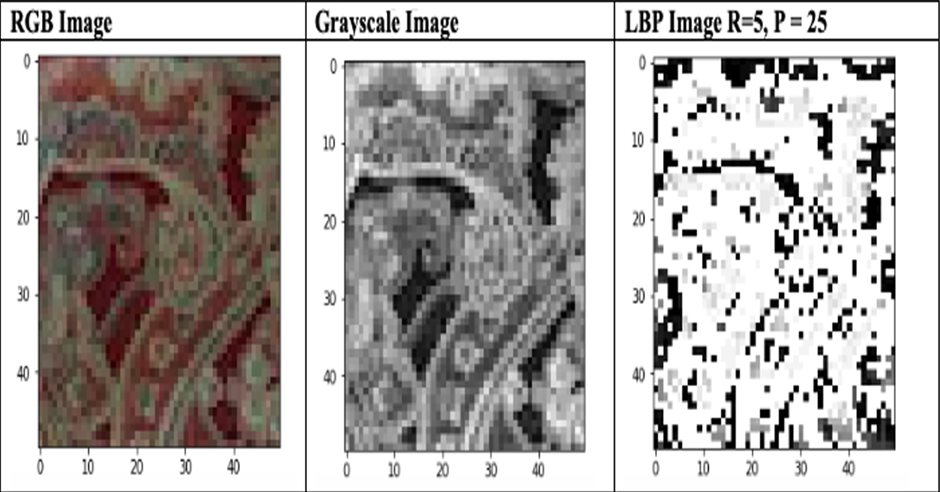
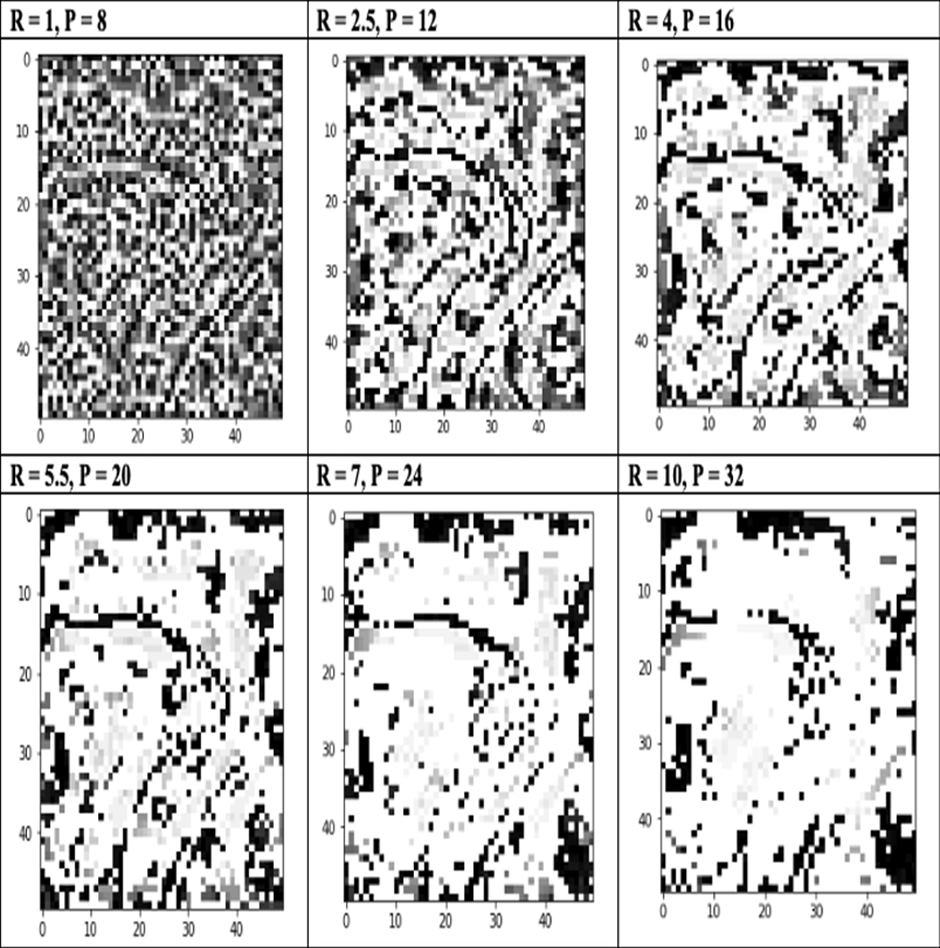

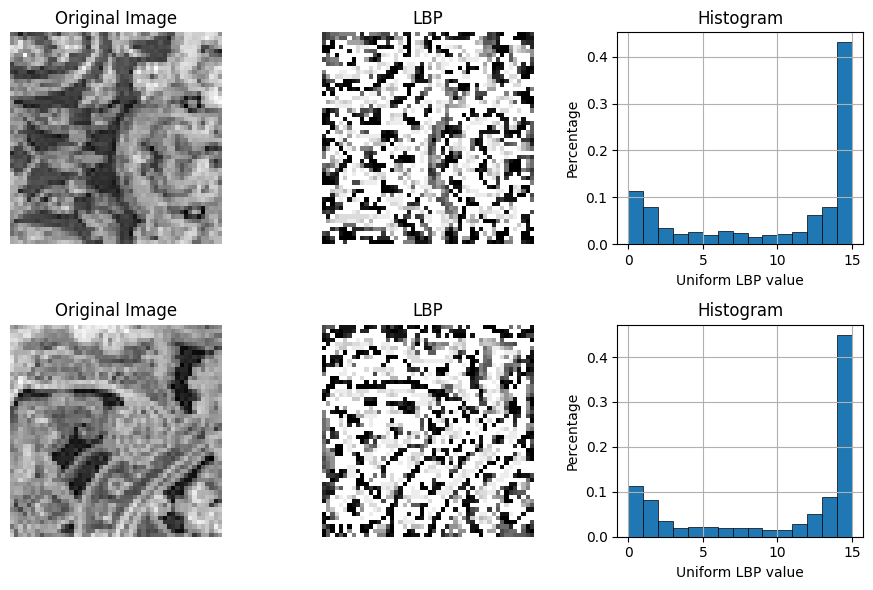

In [23]:
# Membaca gambar
parent_path = './assets/patterndata/'

image_path_1 = parent_path+'test/pattern1test.jpeg'
image_path_2 = parent_path+'train/pattern1train.jpeg'
# ../Computer Vision and  TensorFlow Fundamentals/assets/car1.png

image_rgb = cv2.imread(image_path_1, cv2.IMREAD_COLOR)
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

display_images_with_lbp(
    images=[
        image_path_1, 
        image_path_2, 
    ], 
    is_axis=False, 
    titles=[
        'Original Image', 
        'Original Image', 
    ],
    radius=3,
    # eps=1e-2
)

hists = display_images_with_lbp(
    images=[
        image_path_1, 
        image_path_2, 
    ],
    get_histogram=True,
    radius=4,
)

In [24]:
methods = ['intersection', 'chi_square', 'euclidean', 'city_block', 'bhattacharya', 'wasserstein']

for method in methods:
    result = compare_histograms(method, hist1=hists[0], hist2=hists[1])
    print(f"{method.capitalize()} Method:", result)


Intersection Method: 0.9728
Chi_square Method: 0.003374791756815362
Euclidean Method: 0.017195348207475925
City_block Method: 0.054399999997823995
Bhattacharya Method: 0.0017093461073823108
Wasserstein Method: 0.002222222222133333


### **Biaya Komputasi LBP**
---

#### Efisiensi LBP
LBP secara komputasional lebih murah dibandingkan dengan metode jaringan saraf tradisional. Biaya komputasi LBP dipresentasikan oleh Li Liu, Paul Fieguth, Xiaogang Wang, Matti Pietikäinen, dan Dewen Hu dalam makalah mereka yang berjudul "Evaluation of LBP and Deep Texture Descriptors with A New Robustness Benchmark". Detail makalah dapat ditemukan di sini: [link](https://www.ee.cuhk.edu.hk/~xgwang/papers/liuFWPHeccv16.pdf).

#### Studi Biaya Komputasi
Para penulis menentukan biaya komputasi dalam hal waktu rata-rata yang dihabiskan untuk ekstraksi fitur dari 480 gambar berukuran 128 x 128 pada CPU Intel Quad-Core 2.9 GHz dengan RAM 16 GB. Waktu yang dihitung tidak termasuk waktu pelatihan. Studi ini menemukan bahwa ekstraksi fitur LBP sangat cepat dibandingkan dengan AlexNet dan VGG, yang dianggap memiliki kecepatan sedang.

#### Mengapa Ini Penting?
- **Efisiensi Waktu**: LBP memungkinkan ekstraksi fitur dilakukan dengan cepat, yang berarti bahwa analisis gambar dapat dilakukan dalam waktu yang lebih singkat.
- **Penggunaan Sumber Daya**: Karena LBP menggunakan sumber daya komputasi yang lebih sedikit, ini dapat digunakan pada perangkat dengan daya komputasi terbatas, seperti ponsel atau perangkat IoT.
- **Aplikasi Praktis**: Efisiensi LBP memungkinkan penerapannya dalam aplikasi real-time seperti sistem keamanan, di mana kecepatan adalah faktor penting.

#### Contoh Nyata
- **Sistem Keamanan**: Dalam sistem pengenalan wajah, LBP dapat digunakan untuk dengan cepat memproses gambar wajah dan mencocokkannya dengan database, memastikan bahwa sistem dapat beroperasi dalam waktu nyata.
- **Aplikasi Kecantikan**: Aplikasi yang mencocokkan warna kulit dengan warna foundation dapat memproses gambar secara instan, memberikan hasil yang cepat dan akurat kepada pengguna.
- **Robotika**: Robot yang membutuhkan analisis visual untuk navigasi atau interaksi dapat menggunakan LBP untuk memproses gambar dengan cepat, memungkinkan respon yang lebih cepat terhadap lingkungan sekitarnya.